# Jupyter like a pro

In this third notebook of the tutorial ["The World of Jupyter"](https://github.com/barbagroup/jupyter-tutorial/blob/master/World-of-Jupyter.md), we want to leave you with pro tips for using Jupyter in your future work.

## Importing libraries

First, a word on importing libraries. Previously, we used the following command to load all the functions in the **NumPy** library:
```python
import numpy
```
Once you execute that command in a code cell, you call any **NumPy** function by prepending the library name, e.g., `numpy.linspace()`, [`numpy.ones()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html#numpy.ones), [`numpy.zeros()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html#numpy.zeros), [`numpy.empty()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html#numpy.empty), [`numpy.copy()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.copy.html#numpy.copy), and so on (explore the documentation for these very useful functions!).

But, you will find _a lot_ of sample code online that uses a different syntax for importing. They will do:
```python
import numpy as np
```
All this does is create an alias for `numpy` with the shorter string `np`, so you then would call a **NumPy** function like this: `np.linspace()`. This is just an alternative way of doing it, for lazy people that find it too long to type `numpy` and want to save 3 characters each time. For the not-lazy, typing `numpy` is more readable and beautiful. We like it better like this:

In [1]:
import numpy

## Make your plots beautiful

When you make a plot using **Matplotlib**, you have many options to make your plots beautiful and publication-ready. Here are some of our favorite tricks.

First, let's load the `pyplot` module—and remember, `%matplotlib notebook` gets our plots inside the notebook (instead of a pop-up). 

Our first trick is `rcparams`: we use it to customize the appearance of the plots. Here, we set the default font to a serif type of size 14 pt and make the size of the font for the axes labels 18 pt. Honestly, the default font is too small.

In [2]:
from matplotlib import pyplot
%matplotlib notebook
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 14
pyplot.rcParams['axes.labelsize'] = 18

The following example is from a tutorial by [Dr. Justin Bois](http://www.justinbois.info), a lecturer in Biology and Biological Engineering at Caltech, for his class in [Data Analysis in the Biological Sciences](http://bebi103.caltech.edu/2015/) (2015). He has given us permission to use it.

In [3]:
# Get an array of 100 evenly spaced points from 0 to 2*pi
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

# Make a pointwise function of x with exp(sin(x))
y = numpy.exp(numpy.sin(x))

Here, we added comments in the Python code with the `#` mark. Comments are often useful not only for others who read the code, but as a "note to self" for the future you!

Let's see how the plot looks with the new font settings we gave **Matplotlib**, and make the plot more friendly by adding axis labels. This is always a good idea!

<IPython.core.display.Javascript object>


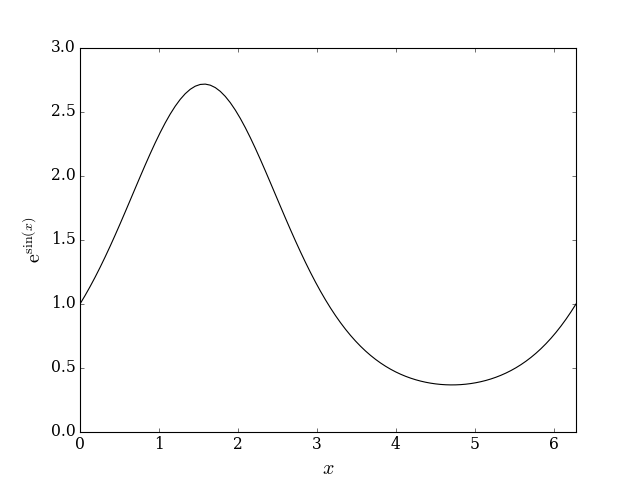

In [4]:
pyplot.figure()
pyplot.plot(x, y, color='k', linestyle='-')
pyplot.xlabel('$x$')
pyplot.ylabel('$\mathrm{e}^{\sin(x)}$')
pyplot.xlim(0.0, 2.0 * numpy.pi);

Did you see how **Matplotlib** understands LaTeX mathematics? That is beautiful. The function `pyplot.xlim()` specifies the limits of the x-axis (you can also manually specify the y-axis, if the defaults are not good for you).

Continuing with the tutorial example by Justin Bois, let's have some mathematical fun and numerically compute the derivative of this function, using finite differences. We need to apply the following mathematical formula on all the discrete points of the `x` array:

\begin{equation}
\frac{\mathrm{d}y(x_i)}{\mathrm{d}x} \approx \frac{y(x_{i+1}) - y(x_i)}{x_{i+1} - x_i}.
\end{equation}

By the way, did you notice how we can typeset beautiful mathematics within a markdown cell? The Jupyter notebook is happy typesetting mathematics using LaTeX syntax.

Since this notebook is _"Jupyter like a pro,"_ we will define a custom Python function to compute the forward difference. It is good form to define custon functions to make your code modular and reusable.

In [5]:
def forward_diff(y, x):
    """Compute derivative by forward differencing."""

    # Use numpy.empty to make an empty array to put our derivatives in
    deriv = numpy.empty(len(y) - 1)

    # Use a for-loop to go through each point and compute the derivative.
    for i in range(len(y)-1):
        deriv[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        
    # Return the derivative (a NumPy array)
    return deriv
        
# Call the function to perform finite differencing
deriv = forward_diff(y, x)

Notice how we define a function with the `def` statement, followed by our custom name for the fuction, the function arguments in parenthesis, and ending the statement with a colon. The contents of the function are indicated by the indentation (four spaces, in this case), and the `return` statement indicates what the function returns to the code that called it (in this case, the contents of the variable `deriv`). Right after the function definition (in between triple quotes) is the _docstring_, a short text documenting what the function does. It is good form to always write docstrings for your functions!

In our custom `forward_diff()` function, we used `numpy.empty()` to create an empty array of length `len(y)-1`, that is, one less than the length of the array `y`. Then, we start a for-loop that iterates over values of `i` using the [**`range()`**](https://docs.python.org/3/library/functions.html#func-range) function of Python. This is a very useful function that you should think about for a little bit. What it does is create a list of numbers. If you give it just one argument, it's a _"stop"_ argument: `range(stop)` creates a list of integers from `0` to `stop-1`, i.e., the list has `stop` numbers in it because it always starts at zero. But you can also give it a _"start"_ and _"step"_ argument.

Experiment with this, if you need to. It's important that you internalize the way `range()` works. Go ahead and create a new code cell, and try things like:
```python
for i in range(5):
   print(i)
```
changing the arguments of `range()`. (Note how we end the `for` statement with a colon.) Now think for a bit: how many numbers does the list have in the case of our custom function `forward_diff()`?

Now, we will make a plot of the numerical derivative of $\exp(\sin(x))$. We can also compare with the analytical derivative:

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}x} = \mathrm{e}^{\sin x}\,\cos x = y \cos x,
\end{equation}

<IPython.core.display.Javascript object>


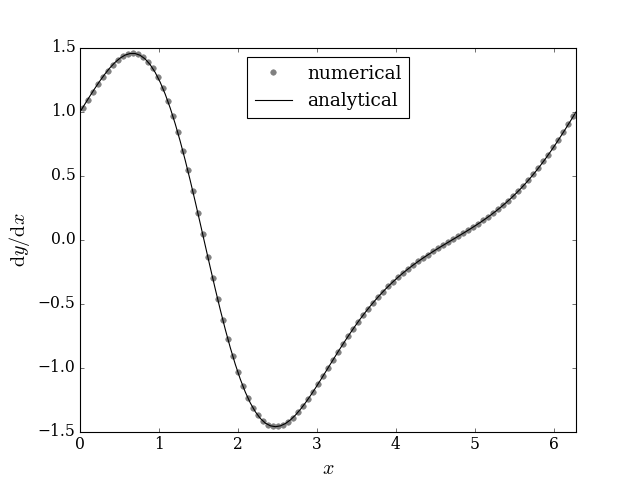

In [6]:
deriv_exact = y * numpy.cos(x) # analytical derivative

pyplot.figure()
pyplot.plot((x[1:] + x[:-1]) / 2.0, deriv, marker='.', color='gray', 
         linestyle='None', markersize=10)
pyplot.plot(x, deriv_exact, 'k-') # analytical derivative in black line

pyplot.xlabel('$x$')
pyplot.ylabel('$\mathrm{d}y/\mathrm{d}x$')
pyplot.xlim((0.0, 2.0 * numpy.pi))
pyplot.legend(('numerical', 'analytical'), loc='upper center', numpoints=1);

Stop for a bit and look at the first `pyplot.plot()` call above. The square brackets normally are how you access a particular element of an array via its index: `x[0]` is the first element of `x`, and `x[i+1]` is the `i`-th element. What's very cool is that you can also use _negative_ indices: they indicate counting backwards from the end of the array, so `x[-1]` is the last element of `x`.

A neat trick of arrays is called [_slicing_](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html): picking elements using the _colon notation_. Its general form is `x[start:stop:step]`. Note that, like the `range()` function, the `stop` index is _exclusive_, i.e., `x[stop]` is not included in the result. 

For example, this code will give the odd numbers from `1` to `7`:
```python
x = numpy.array( [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] )
x[1:-1:2]
```
Try it! Remember, Python arrays are indexed from `0`, so `x[1]` is the second element. The end-point in the slice above is index `-1`, that's the last array element (not included in the result), and we're stepping by `2`, i.e., every other element. If the `step` is not given, it defaults to `1`. If `start` is not given, it defaults to the first array element, and if `stop` is not given, it defaults to the last element. Try several variations on the slice, until you're comfortable with it.

## There's a built-in for that

Here's another pro tip: whenever you find yourself writing a custom function for something that seems that a lot of people might use, find out first if there's a built-in for that. In this case, **NumPy** does indeed have a built-in for taking the numerical derivative by differencing! Check it out. We also use the function `numpy.allclose()` to check if the two results are close.

In [7]:
numpy_deriv = numpy.diff(y) / numpy.diff(x)
print('Are the two results close? ', numpy.allclose(numpy_deriv, deriv))

Are the two results close?  True


Not only is the code much more compact and easy to read with the built-in **NumPy** function for the numerical derivative ... it is also much faster:

In [8]:
%timeit numpy_deriv = numpy.diff(y) / numpy.diff(x)
%timeit deriv = forward_diff(y, x)

The slowest run took 4.74 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.21 µs per loop
10000 loops, best of 3: 71.2 µs per loop


**NumPy** functions will always be faster than equivalent code you write yourself because at the heart they use pre-compiled code and highly optimized numerical libraries, like BLAS and LAPACK.

## Do math like a pro

Do you want to compute the integral of $y(x) = \mathrm{e}^{\sin x}$? Of course you do. We find the analytical integral  using the integral formulas for modified Bessel functions:

\begin{equation}
\int_0^{2\pi}\mathrm{d} x\, \mathrm{e}^{\sin x} = 2\pi \,I_0(1),
\end{equation}

where $I_0$ is the modified Bessel function of the first kind. But if you don't have your special-functions handbook handy, we can find the integral with Python. We just need the right modules from the [**SciPy**](http://docs.scipy.org/doc/scipy/reference/) library. **SciPy** has a module of special functions, including Bessel functions, called `scipy.special`. Let's get that loaded, then use it to compute the exact integral:

In [9]:
import scipy.special
exact_integral = 2.0 * numpy.pi * scipy.special.iv(0, 1.0)

print('Exact integral:', exact_integral)

Exact integral: 7.95492652101


Or instead, we may want to compute the integral numerically, via the trapezoid rule. The integral is over one period of a periodic function, so only the constant term of its Fourier series will contribute (the periodic terms integrate to zero). The constant Fourier term is the mean of the function over the interval, and the integral is the area of a rectangle: $2\pi \langle y(x)\rangle_x$. Sampling $y$ at $n$ evenly spaced points over the interval of length $2\pi$, we have:

\begin{align}
\int_0^{2\pi}\mathrm{d} x\, y(x) \approx \frac{2\pi}{n}\sum_{i=0}^{n} y(x_i),
\end{align}

**NumPy** gives as a `mean` method to quickly get the sum:

In [10]:
approx_integral = 2.0 * numpy.pi * y[:-1].mean()

print('Approximate integral:', approx_integral)
print('Error: ', exact_integral - approx_integral)

Approximate integral: 7.95492652101
Error:  0.0


In [11]:
approx_integral = 2.0 * numpy.pi * numpy.mean(y[:-1])

print('Approximate integral:', approx_integral)
print('Error: ', exact_integral - approx_integral)

Approximate integral: 7.95492652101
Error:  0.0


The syntax `y.mean()` applies the `mean()` **NumPy** method to the array `y`. Here, we apply the method to a _slice_ of `y` that does not include the last element (see discussion of _slicing_ above). We could have also done `numpy.mean(y[:-1])` (the function equivalent of the method `mean()` applied to an array); they give equivalent results and which one you choose is a matter of style.

## Beautiful interactive plots with Bokeh

**Matplotlib** will be your workhorse for creating plots in notebooks. But it's not the only game in town! A recent new player is [**Bokeh**](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb), a visualization library to make amazing interactive plots and share them online. It can also handle very large data sets with excellent performance.

If you installed **Anaconda** in your system, you will probably already have **Bokeh**. You can check if it's there by running the `conda list` command. If you installed **Miniconda**, you will need to install it with `conda install bokeh`.

After installing **Bokeh**, we have many modules available: [`bokeh.plotting`](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh-plotting) gives you the ability to create interactive figures with zoom, pan, resize, save, and other tools.

In [12]:
from bokeh.plotting import figure, output_notebook, show

**Bokeh** integrates with Jupyter notebooks by calling the output function, as follows:

In [13]:
output_notebook()

Loading BokehJS ...

In [14]:
# create a new Bokeh plot with axis labels, name it "bop"
bop = figure(x_axis_label='x', y_axis_label='dy/dx')

# add a title, change the font
bop.title = "Derivative of exp(sin(x))"
bop.title_text_font = "palatino"

# add a line with legend and line thickness to "bop"
bop.line(x, deriv_exact, legend="analytical", line_width=2)

# add circle markers with legend, specify color
bop.circle((x[1:] + x[:-1]) / 2.0, deriv, legend="numerical", fill_color="gray", size=8, line_color=None)

bop.grid.grid_line_alpha=0.3

show(bop);

**Note**—As of June 2016 (v.0.11.1), Bokeh does not support LaTeX on axis labels. This is an [issue](https://github.com/bokeh/bokeh/issues/647) they are working on, so stay tuned!

Look at the neat tools on the **Bokeh** figure: you can zoom in to any portion to explore the data, you can drag the plot area around, resize and finally save the figure to a file. You also have many beautiful [styling](http://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#userguide-styling) options! 

# Optional next step: get interactive with Lorenz

We found two really cool ways for you to get interactive with the Lorenz equations! Try out the interactive blog post by Tim Head on [Exploring the Lorenz equations](https://betatim.github.io/posts/interactive-posts/) (January 2016), and learn about IPython widgets. Or, check out the [Lorentz example on **Bokeh** plots](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/gallery/lorenz.ipynb). Better yet, try them both.

---

<p style="font-size:smaller">(c) 2016 Lorena A. Barba. Free to use under Creative Commons Attribution <a href="https://creativecommons.org/licenses/by/4.0/">CC-BY 4.0 License</a>. This notebook was written for the tutorial <a href="https://github.com/barbagroup/jupyter-tutorial/blob/master/World-of-Jupyter.md">"The world of Jupyter"</a> at the Huazhong University of Science and Technology (HUST), Wuhan, China.
</p>
<p style="font-size:smaller">Example from Justin Bois (c) 2015 also under a <a href="https://creativecommons.org/licenses/by/4.0/">CC-BY 4.0 License</a>.
</p>